In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('seaborn-muted')

In [2]:
import pandas as pd
import networkx as nx

from sqlalchemy.sql import functions as func

from osp_graphs.v1_db import session, Text, Field, Subfield, SubfieldDocument, Citation, Document
from osp_graphs.v1 import Graph

In [3]:
pd.options.display.max_rows = 1000

In [15]:
def top_texts_by_field(field, n=20):

    count = func.count(Citation.text_id)

    res = (session
        .query(Text.id)
        .join(Citation, Document, SubfieldDocument, Subfield, Field)
        .filter(Text.valid==True)
        .filter(Text.display==True)
        .filter(Field.name==field)
        .group_by(Text.id)
        .order_by(count.desc())
        .limit(n))
    
    return set([r[0] for r in res.all()])

In [16]:
tids = top_texts_by_field('Philosophy', 20)

In [17]:
g = Graph.from_text_ids(tids)

14336it [00:00, 140888.55it/s]
20it [00:00, 7530.17it/s]


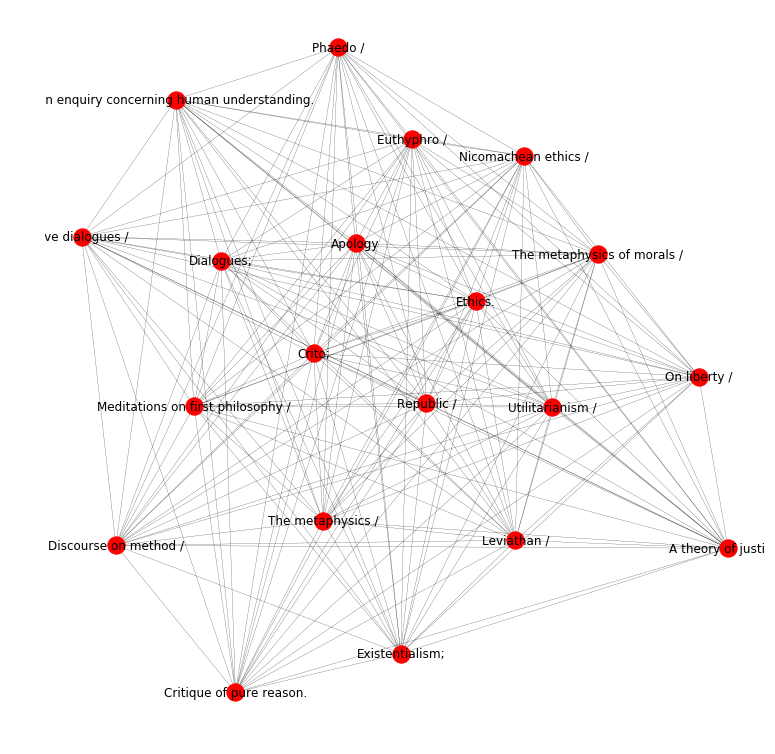

In [18]:
labels = nx.get_node_attributes(g, 'title')
plt.figure(figsize=(10,10))
nx.draw_spring(g, width=0.2, labels=labels)